## Name : Bryan Cheng Hengze

# Task A: Data Wrangling and Analysis on TAO dataset

In [75]:
import pandas as pd

In [76]:
tao = pd.read_csv('TAO_2006.csv')

## A1. Dataset size

In [77]:
tao.shape

(35136, 8)

## A2. Min/Max values in each column

In [78]:
tao.min()

Timestamp           0
YYYYMMDD     20060101
HHMMSS              0
PREC            -9.99
AIRT            -99.9
SST             -99.9
RH              -99.9
Q               HighQ
dtype: object

In [79]:
tao.max()

Timestamp       35135
YYYYMMDD     20060901
HHMMSS         235000
PREC            75.77
AIRT            31.57
SST            31.346
RH               98.1
Q                LowQ
dtype: object

## A3. Number of records in each month

In [80]:
print(tao['YYYYMMDD'].dtype)

int64


In [81]:
tao['YYYYMMDD'] = pd.to_datetime(tao['YYYYMMDD'], format='%Y%m%d')

In [82]:
print(tao['YYYYMMDD'].dtype)

datetime64[ns]


In [83]:
tao['Month'] = tao['YYYYMMDD'].dt.month

In [84]:
func = {'Month':{'Number of records':'count'}}
tao_filt = tao.groupby('Month').agg(func).reset_index()
tao_filt.columns = tao_filt.columns.droplevel(0)
tao_filt=tao_filt.rename(columns = {"":"Month"})
tao_filt

C:\Users\Bryan\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Month,Number of records
0,1,4464
1,2,4032
2,3,4464
3,4,4320
4,5,4464
5,6,4320
6,7,4464
7,8,4464
8,9,144


## A4. Missing Values

## 1)

In [85]:
import numpy as np
tao2 = pd.read_csv('TAO_2006.csv')
tao2['YYYYMMDD'] = pd.to_datetime(tao['YYYYMMDD'], format='%Y%m%d')
tao2['Month'] = tao2['YYYYMMDD'].dt.month
cols = ["Timestamp","YYYYMMDD","HHMMSS","PREC","AIRT","SST","RH","Q"]
tao2[cols] = tao2[cols].replace({'-9.99':np.nan, -9.99:np.nan})
tao2[cols] = tao2[cols].replace({'-99.9':np.nan, -99.9:np.nan})

In [86]:
null = tao2[tao2.isnull().any(axis=1)]
null.shape[0]

401

## 2)

In [87]:
set(tao['Month'].unique())-set(null['Month'].unique())

{2, 5, 9}

## 3)

In [88]:
tao2 = tao2.dropna()

## A5. Investigating Sea surface temperature (SST) in different months

## 1)

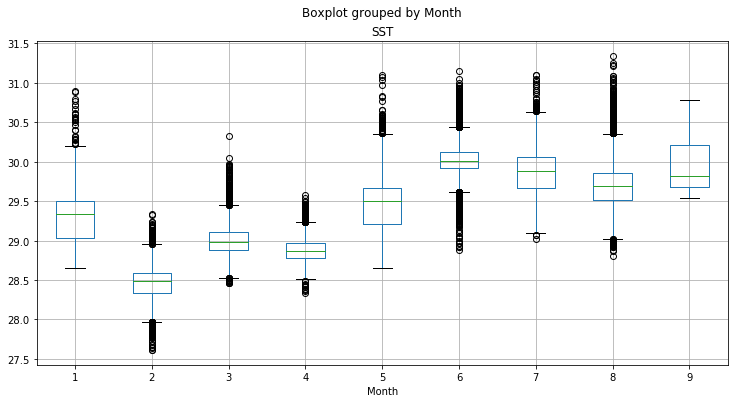

In [89]:
tao2.boxplot(by="Month", column="SST",figsize=(12,6))

## 3)

In [90]:
filt = tao2.groupby(['Month'])['SST'].median().reset_index()
filt

,Month,SST
0,1,29.334
1,2,28.484
2,3,28.979
3,4,28.862
4,5,29.497
5,6,30.013
6,7,29.877
7,8,29.698
8,9,29.822


### Highest median SST

In [91]:
filt["Month"][filt["SST"].idxmax()]

6

### Lowest median SST

In [92]:
filt["Month"][filt["SST"].idxmin()]

2

## A6. Exploring precipitation measurements (PREC)

## 1)

In [93]:
import matplotlib.pyplot as plt

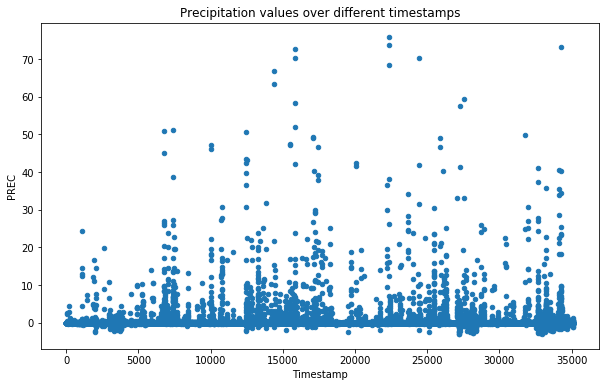

In [94]:
tao2.plot(kind='scatter',x='Timestamp',y='PREC',title ='Precipitation values over different timestamps',figsize=(10,6))

## 2)

In [95]:
tao2.loc[tao2['PREC'] < 0, 'PREC'] = 0

## A7. Relationship between variables

## 1)

In [96]:
tao2['PREC'].corr(tao2['AIRT'])

-0.30351271242727007

In [97]:
tao2['PREC'].corr(tao2['SST'])

-0.03485242673000577

In [98]:
tao2['AIRT'].corr(tao2['SST'])

0.3661185462421808

## 2)

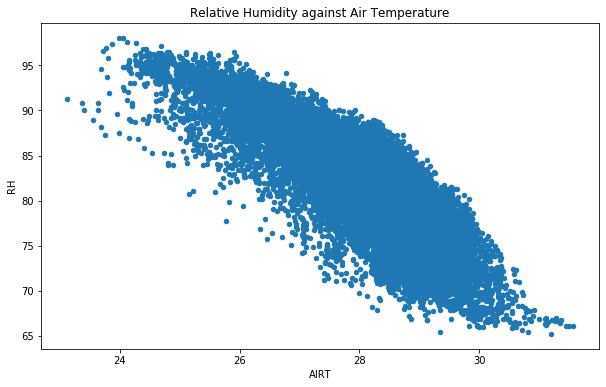

In [99]:
tao2.plot(kind='scatter',x='AIRT',y='RH',title = 'Relative Humidity against Air Temperature',figsize=(10,6))

## A8. Predicting quality of measurements(Q)

## 1)

In [100]:
a = tao2.iloc[:, [3, 4, 5, 6]].values # PREC, AIRT, SST, RH
b = tao2.iloc[:, 7].values # Q
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.25, random_state = 0)

## 2)

In [101]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(a_train, b_train)

b_pred = classifier.predict(a_test)
from sklearn.metrics import confusion_matrix
confusionm = confusion_matrix(b_test, b_pred)
print('Confusion Matrix : \n')
print(confusionm)

Confusion Matrix : 

[[8670    8]
 [   4    2]]


In [102]:
from sklearn.metrics import accuracy_score 
print('Accuracy : ', accuracy_score(b_test, b_pred))

Accuracy :  0.9986181483187471


## A9. Investigating daily relative humidity (RH)

## 1)

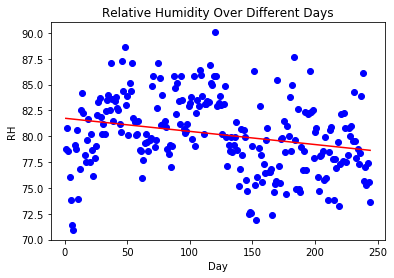

In [103]:
tao2['Day'] = tao2['YYYYMMDD'].dt.day
filt = tao2.groupby('YYYYMMDD')[['RH']].median().reset_index()

day = []
for i in range(len(filt["YYYYMMDD"])):
    day.append(i+1)
filt["Day"] = day
filt.drop(columns = "YYYYMMDD", inplace = True)
from sklearn.linear_model import LinearRegression 
a = filt.iloc[:, [1]].values.reshape(-1,1)
b = filt.iloc[:, [0]].values.reshape(-1,1)
lin = LinearRegression() 
lin.fit(a, b) 

b_pred = lin.predict(a)
plt.scatter(a, b, color = 'blue') 
plt.plot(a, b_pred, color = 'red')
plt.xlabel("Day")
plt.ylabel("RH")
plt.title('Relative Humidity Over Different Days') 
plt.show() 

## 2)

In [104]:
print(lin.predict([[245]]))

[[78.62522769]]


## 3)

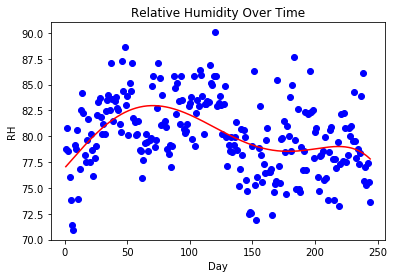

In [105]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 5) 

lin2 = LinearRegression() 
a = filt.iloc[:, [1]].values
b = filt.iloc[:, [0]].values
a_poly = poly.fit_transform(a) 
lin2.fit(a_poly, b)
plt.scatter(a, b, color = 'blue') 
  
plt.plot(a, lin2.predict(poly.fit_transform(a)), color = 'red') 
plt.title('Relative Humidity Over Time') 
plt.xlabel('Day') 
plt.ylabel('RH') 
  
plt.show()

In [106]:
lin2.predict(poly.transform([[245]])) 

array([[77.68150497]])

## A10. Filling in missing values

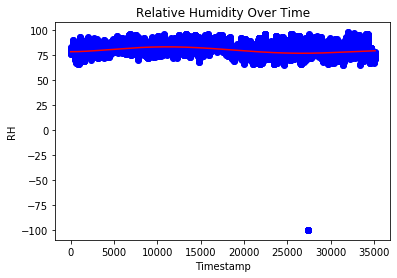

In [107]:
poly = PolynomialFeatures(degree = 5) 

lin2 = LinearRegression()
a = tao.iloc[:, [0]].values
b = tao.iloc[:, [6]].values
a_poly = poly.fit_transform(a)
lin2.fit(a_poly, b)
plt.scatter(a, b, color = 'blue') 
  
plt.plot(a, lin2.predict(poly.fit_transform(a)), color = 'red') 
plt.title('Relative Humidity Over Time') 
plt.xlabel('Timestamp') 
plt.ylabel('RH') 
  
plt.show()
for i in range(len(tao['RH'])):
    if (tao['RH'][i] == -9.99 or tao['RH'][i] == -99.9):
        tao.loc[tao['Timestamp'] == i,'RH'] = lin2.predict(poly.transform([[tao['Timestamp'][i]]]))[0]
        

# Task B: K-means Clustering on Other Data

In [108]:
from sklearn.cluster import KMeans
happy = pd.read_csv('happiness.csv')
happy.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [109]:
happy.shape

(155, 12)

Text(0, 0.5, 'Economy GDP per Capita')

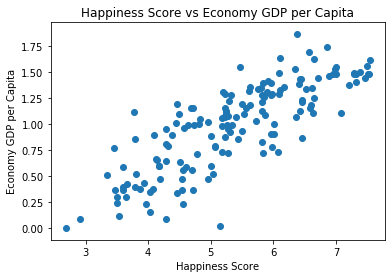

In [110]:
%matplotlib inline
plt.scatter(x=happy['Happiness.Score'],y=happy['Economy..GDP.per.Capita.'])
plt.title('Happiness Score vs Economy GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('Economy GDP per Capita')

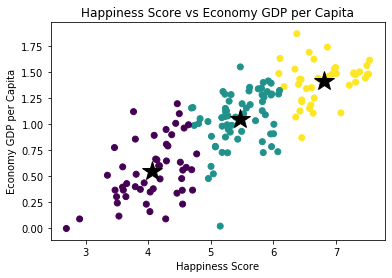

In [111]:
cluster = KMeans(n_clusters=3).fit(happy[['Happiness.Score','Economy..GDP.per.Capita.']])

plt.scatter(x=happy['Happiness.Score'],y=happy['Economy..GDP.per.Capita.'], c=cluster.labels_)

plt.plot(cluster.cluster_centers_[:,0],cluster.cluster_centers_[:,1],'k*',markersize=20)
plt.title('Happiness Score vs Economy GDP per Capita')
plt.xlabel('Happiness Score')
plt.ylabel('Economy GDP per Capita')
plt.show()